In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# sudo docker run -it --cpus=2 -m 2048m 8d88f2b465f1

In [2]:
results_paths = [
    'results/pure_torch/MobileNetV3Small.json',
    'results/pure_torch/MobileNetV3Large.json',
    'results/pure_torch/ResNet18.json',

    'results/jit/MobileNetV3Small.json',
    'results/jit/MobileNetV3Large.json',
    'results/jit/ResNet18.json',

    'results/onnx/MobileNetV3Small.json',
    'results/onnx/MobileNetV3Large.json',
    'results/onnx/ResNet18.json',
]

CONFIGURATION_MEM = 2048
CONFIGURATION_CPUS = 2

results = []
for fpath in results_paths:
    model_name = fpath.split('/')[-1].split('.')[0]
    runtime_type = fpath.split('/')[-2]
    with open(fpath, 'r') as f:
        benchmark = json.load(f)
    results.append((model_name, runtime_type, benchmark))


In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

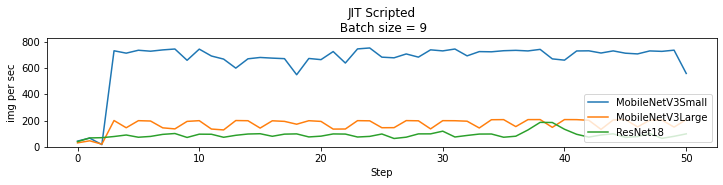

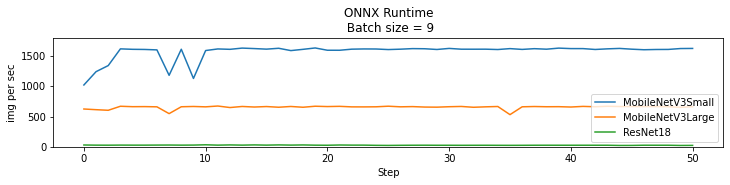

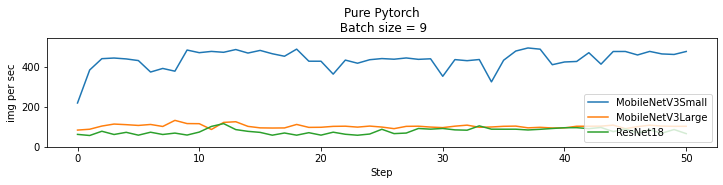

In [12]:
def comparable_bs9():
    plt.figure(figsize=(12, 2))
    lim = 0
    for model_name, runtime_type, benchmark in results:
        if runtime_type == 'jit':
            line = running_mean(benchmark['9'], 1)
            lim = max(lim, np.max(line))
            plt.plot(list(range(len(line))), line, label=model_name)
    plt.title('JIT Scripted\n Batch size = 9')
    plt.legend(loc='lower right')
    plt.xlabel('Step')
    plt.ylim((0, lim * 1.1))
    plt.ylabel('img per sec')
    plt.savefig('plots/compare_jit.jpg', bbox_inches='tight', dpi=450)

    plt.figure(figsize=(12, 2))
    lim = 0
    for model_name, runtime_type, benchmark in results:
        if runtime_type == 'onnx':
            line = running_mean(benchmark['9'], 1)
            lim = max(lim, np.max(line))
            plt.plot(list(range(len(line))), line, label=model_name)
    plt.title('ONNX Runtime\n Batch size = 9')
    plt.legend(loc='lower right')
    plt.xlabel('Step')
    plt.ylim((0, lim * 1.1))
    plt.ylabel('img per sec')
    plt.savefig('plots/compare_onnx.jpg', bbox_inches='tight', dpi=450)


    plt.figure(figsize=(12, 2))
    lim = 0
    for model_name, runtime_type, benchmark in results:
        if runtime_type == 'pure_torch':
            line = running_mean(benchmark['9'], 1)
            lim = max(lim, np.max(line))
            plt.plot(list(range(len(line))), line, label=model_name)
    plt.title('Pure Pytorch\n Batch size = 9')
    plt.legend(loc='lower right')
    plt.xlabel('Step')
    plt.ylim((0, lim * 1.1))
    plt.ylabel('img per sec')
    plt.savefig('plots/compare_torch.jpg', bbox_inches='tight', dpi=450)
comparable_bs9()

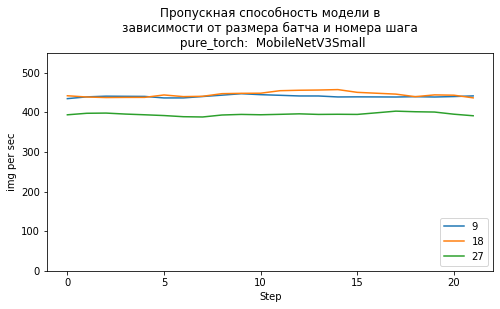

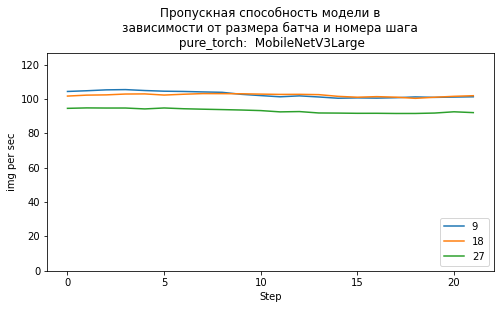

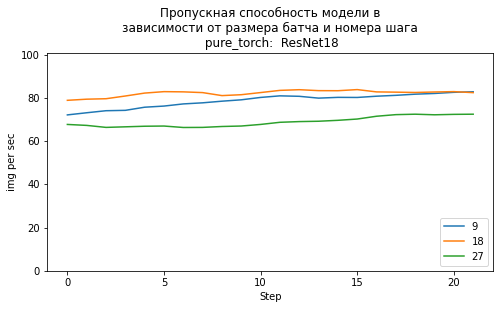

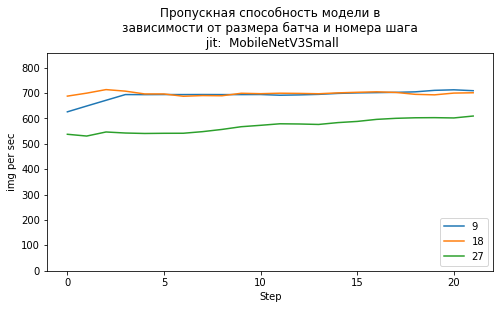

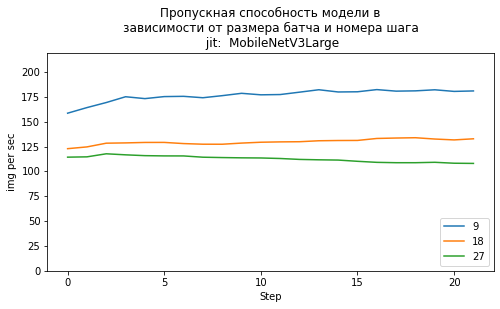

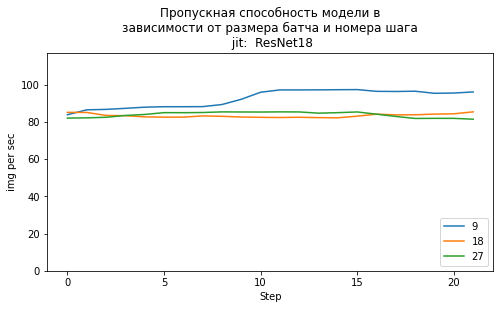

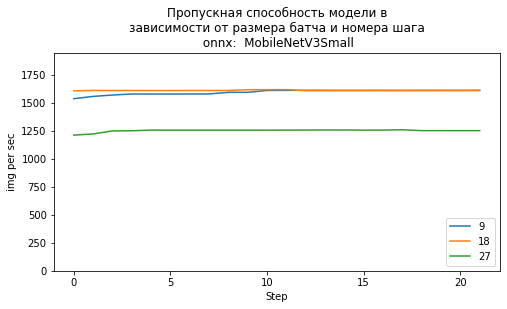

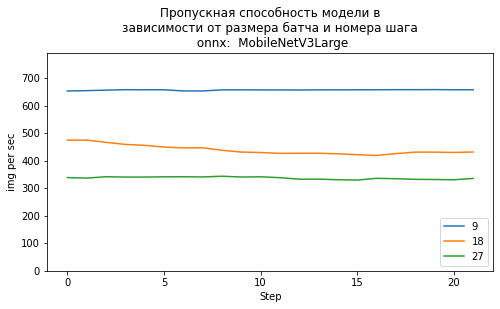

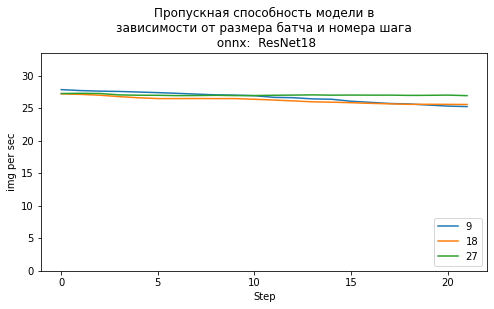

In [5]:
def make_plots():
    for model_name, runtime_type, benchmark in results:
        fig = plt.figure(figsize=(8,4))
        lim = 0
        for key in list(benchmark.keys()):
            line = running_mean(benchmark[key], 30)
            lim = max(lim, np.max(line))
            plt.plot(list(range(len(line))), line, label=key)
        plt.legend(loc='lower right')
        plt.title('Пропускная способность модели в\nзависимости от размера батча и номера шага\n {}:  {}'.format(runtime_type, model_name))
        plt.xlabel('Step')
        plt.ylim((0, lim * 1.2))
        plt.ylabel('img per sec')
        plt.savefig('plots/all_lines_{}_{}.jpg'.format(runtime_type, model_name), bbox_inches='tight', dpi=450)
        # plt.show()

make_plots()

Text(0, 0.5, 'img per sec')

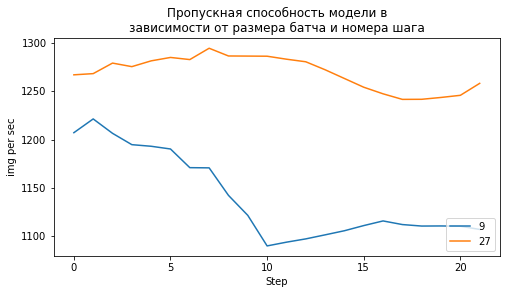

In [17]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


with open('results/onnx/MobileNetV3Small.json', 'r') as f:
    results = json.load(f)

# with open('pure_torch_MobileNetV3Large.json', 'r') as f:
#     results = json.load(f)

# with open('results/pure_torch/ResNet18.json', 'r') as f:
#     results = json.load(f)

# with open('results/onnx/ResNet18.json', 'r') as f:
#     results = json.load(f)

plt.figure(figsize=(8,4))
lim = 0
for key in list(results.keys())[::2]:
    line = running_mean(results[key], 30)
    # lim = max(lim, np.max(line))
    plt.plot(list(range(len(line))), line, label=key)
plt.legend(loc='lower right')
plt.title('Пропускная способность модели в\nзависимости от размера батча и номера шага')
plt.xlabel('Step')
# plt.ylim((0, lim))
plt.ylabel('img per sec')